<h1> <center> Analyzing Air Quality in Gurugram </h1> </center>

![image.png](attachment:image.png)

### Life Cycle or machine learning project
* Research previous work and Data Collection
* Data Collection
* Exploratory Data Analysis
* Preprocessing and feature engineering
* Model Development
* Model Training
* Model Analysis and Interpretation
* App Development

## 1.) Project Problem Statement

* Air pollution is a major environmental and public health issue in India, with Gurugram being one of the worst affected cities. Gurugram is a rapidly growing industrial and urban hub in the National Capital Region (NCR) of India, and is known for its high levels of air pollution caused by emissions from vehicular traffic, industries, construction activities, and other anthropogenic sources.
* The Air Quality Index (AQI) is a measure of how polluted the air is and it reflects the concentration of major air pollutants, such as PM2.5, PM10, nitrogen oxides, and sulfur dioxide, among others. AQI ranges from 0 to 500, with higher values indicating more polluted air.
* The need to analyse air quality in Gurugram using machine learning arises from the fact that air pollution is a major public health concern, and it has been linked to a range of health problems, such as respiratory and cardiovascular diseases, lung cancer, and stroke. In addition, air pollution also has adverse effects on the environment, such as acid rain, ozone depletion, and climate change. Therefore, it is essential to monitor and analyse air quality trends in Gurugram to better understand the causes of pollution, identify hotspots, and design effective strategies to reduce air pollution and protect public health and the environment.

## 2.) Data Collection

#### Data Source: https://drive.google.com/drive/folders/1Oi_9BZgg6MDzezfmxcbiJAF-zDJymdsL

## 2.1) Import Data and Required Libraries

#### NumPy, Pandas, Matplotlib, Seaborn, Warings and scikit learn Library

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import missingno as mno
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.impute import SimpleImputer

## 2.2) Import the Datasets as Pandas DataFrame

In [3]:
Gurugram_Hourly_Data_2015_2020 = pd.read_excel(r"Gurugram_HourlyData_2015-2020.xlsx")
Gurugram_DailyData_FourStations = pd.read_excel(r"Gurugram_DailyData_FourStations_2015-2020.xlsx")
Gurugram_hourly_stations = pd.read_csv(r"Gurugram_hourly_4_stations_4_March_20_to_26_March_23.csv")
Gurugram_Hourly_Compiled = pd.read_csv(r"Gurugram_Hourly_Compiled.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Gurugram_HourlyData_2015-2020.xlsx'

## 2.3) Show Top 5 Records

In [50]:
Gurugram_Hourly_Data_2015_2020.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Gurugram,2015-11-27 15:00:00,NaN,NaN,NaN,12.50,5.85,NaN,0.08,NaN,17.65,NaN,NaN,NaN,NaN,NaN
1,Gurugram,2015-11-27 16:00:00,NaN,NaN,4.02,10.03,10.34,NaN,1.40,8.38,13.42,NaN,NaN,NaN,NaN,NaN
2,Gurugram,2015-11-27 17:00:00,NaN,NaN,11.25,7.07,15.14,NaN,1.75,16.69,5.42,NaN,NaN,NaN,NaN,NaN
3,Gurugram,2015-11-27 18:00:00,NaN,NaN,4.55,7.06,8.44,NaN,2.91,18.85,3.22,NaN,NaN,NaN,NaN,NaN
4,Gurugram,2015-11-27 19:00:00,NaN,NaN,5.68,7.80,9.67,NaN,4.58,21.52,5.15,NaN,NaN,NaN,NaN,NaN


In [51]:
Gurugram_DailyData_FourStations.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,"NISE Gwal Pahari, Gurugram - IMD",2017-12-31,229.87,395.40,95.94,27.91,110.87,NaN,3.74,NaN,20.81,NaN,NaN,NaN,376.0,Very Poor
1,"NISE Gwal Pahari, Gurugram - IMD",2018-01-01,370.07,17.16,50.16,22.81,72.97,NaN,4.18,NaN,21.95,NaN,NaN,NaN,435.0,Severe
2,"NISE Gwal Pahari, Gurugram - IMD",2018-01-02,360.72,NaN,45.23,20.52,65.75,NaN,4.22,NaN,17.54,NaN,NaN,NaN,495.0,Severe
3,"NISE Gwal Pahari, Gurugram - IMD",2018-01-03,270.12,444.17,48.85,19.25,68.10,NaN,3.61,NaN,15.03,NaN,NaN,NaN,445.0,Severe
4,"NISE Gwal Pahari, Gurugram - IMD",2018-01-04,193.96,339.33,55.36,21.93,77.29,NaN,3.54,NaN,19.36,NaN,NaN,NaN,382.0,Very Poor


In [52]:
Gurugram_hourly_stations.head()

,Unnamed: 0,From Date,To Date,Station,PM2.5,NO,NO2,NOx,SO2,CO,...,SR,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2
0,0,04-03-2020 00:00,04-03-2020 01:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.5,3.01,...,35.43,773.65,-0.27,3.1,None,None,0.0,NaN,NaN,NaN
1,1,04-03-2020 01:00,04-03-2020 02:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,...,35.07,773.42,-0.27,3.03,None,None,0.0,NaN,NaN,NaN
2,2,04-03-2020 02:00,04-03-2020 03:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.6,1.85,...,34.62,772.7,-0.27,3.08,None,None,0.0,NaN,NaN,NaN
3,3,04-03-2020 03:00,04-03-2020 04:00,Vikas Sadan,67.6,377.93,29.18,317.53,10.53,1.31,...,34.78,772.2,-0.27,3.02,None,None,0.0,NaN,NaN,NaN
4,4,04-03-2020 04:00,04-03-2020 05:00,Vikas Sadan,72.72,319.8,33.66,273.25,9.98,0.63,...,33.48,772.15,-0.27,2.97,None,None,0.0,NaN,NaN,NaN


In [53]:
Gurugram_Hourly_Compiled.head()

,Datetime,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,...,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2,O3,AQI,AQI_Bucket
0,04-03-2020 00:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.5,3.01,5.08,2.04,...,3.1,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,04-03-2020 01:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,6.15,2,...,3.03,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,04-03-2020 02:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.6,1.85,12.72,2.02,...,3.08,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,04-03-2020 03:00,Vikas Sadan,67.6,377.93,29.18,317.53,10.53,1.31,11.46,1.96,...,3.02,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,04-03-2020 04:00,Vikas Sadan,72.72,319.8,33.66,273.25,9.98,0.63,4.76,2.01,...,2.97,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## 2.4) Concatenated data from multiple Gurugram air quality datasets

In [54]:
df = pd.concat([Gurugram_Hourly_Data_2015_2020, Gurugram_DailyData_FourStations, Gurugram_hourly_stations, Gurugram_Hourly_Compiled], ignore_index = True, )

## 2.5) Show top 5 records

In [55]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,RH,WS,WD,SR,BP,VWS,AT,RF,TOT-RF,CO2
0,Gurugram,2015-11-27 15:00:00,NaN,NaN,NaN,12.5,5.85,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gurugram,2015-11-27 16:00:00,NaN,NaN,4.02,10.03,10.34,NaN,1.4,8.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gurugram,2015-11-27 17:00:00,NaN,NaN,11.25,7.07,15.14,NaN,1.75,16.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gurugram,2015-11-27 18:00:00,NaN,NaN,4.55,7.06,8.44,NaN,2.91,18.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gurugram,2015-11-27 19:00:00,NaN,NaN,5.68,7.8,9.67,NaN,4.58,21.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.6) Shape of the dataset

In [56]:
df.shape

(297893, 37)

#### Insight:
* Rows(297893) and Columns(37)

## 2.7) Column names in the dataset

In [57]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationId', 'Date', 'Unnamed: 0', 'From Date', 'To Date', 'Station',
       'Ozone', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD',
       'SR', 'BP', 'VWS', 'AT', 'RF', 'TOT-RF', 'CO2'],
      dtype='object')

## 3.) Data Checks to perform
* Check data type
* Check the number of unique values of each column
* Check Missing values
* Fill NaN values
* Drop Columns
* Missing Value graph
* Check Duplicates
* Change data types
* Check statistics of data set
* Checking Outliers
* Distribution of the AQI Bucket column
* Check various categories present in the different categorical column

## 3.1) Check data types

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297893 entries, 0 to 297892
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   City         40258 non-null   object        
 1   Datetime     187789 non-null  object        
 2   PM2.5        285224 non-null  object        
 3   PM10         194992 non-null  object        
 4   NO           283990 non-null  object        
 5   NO2          285387 non-null  object        
 6   NOx          271864 non-null  object        
 7   NH3          112845 non-null  object        
 8   CO           287289 non-null  object        
 9   SO2          225882 non-null  object        
 10  O3           72054 non-null   float64       
 11  Benzene      217539 non-null  object        
 12  Toluene      209651 non-null  object        
 13  Xylene       166786 non-null  object        
 14  AQI          69172 non-null   float64       
 15  AQI_Bucket   69172 non-null   obje

## 3.2) Checking the number of unique values of each column

In [59]:
df.nunique()

City                1
Datetime       107341
PM2.5           44640
PM10            45970
NO              15151
NO2             15461
NOx             18056
NH3             14036
CO               2237
SO2              8362
O3              10022
Benzene          3825
Toluene         12917
Xylene           3439
AQI               685
AQI_Bucket          6
StationId           4
Date             1679
Unnamed: 0     107273
From Date       26825
To Date         26828
Station             4
Ozone           13252
Eth-Benzene      3438
MP-Xylene        3985
O                3496
Temp             7398
RH               9355
WS                316
WD              26787
SR              23439
BP               5520
VWS                71
AT               3954
RF                149
TOT-RF            145
CO2                 1
dtype: int64

#### Insights:
* Number of unique values are available in each column in our dataset

## 3.3) Checking the number of missing values of each column

In [60]:
df.isnull().sum()

City           257635
Datetime       110104
PM2.5           12669
PM10           102901
NO              13903
NO2             12506
NOx             26029
NH3            185048
CO              10604
SO2             72011
O3             225839
Benzene         80354
Toluene         88242
Xylene         131107
AQI            228721
AQI_Bucket     228721
StationId      295062
Date           295062
Unnamed: 0     190620
From Date      190620
To Date        190620
Station         83347
Ozone           83347
Eth-Benzene    136979
MP-Xylene      136979
O              244261
Temp           244261
RH             136979
WS             190611
WD             136979
SR             136979
BP             244261
VWS            244261
AT             136979
RF              83347
TOT-RF          83347
CO2            244261
dtype: int64

#### Insights:
* Number of missing values are available in each column in our dataset

## 3.4) Data types of the dataset

In [61]:
df.dtypes

City                   object
Datetime               object
PM2.5                  object
PM10                   object
NO                     object
NO2                    object
NOx                    object
NH3                    object
CO                     object
SO2                    object
O3                    float64
Benzene                object
Toluene                object
Xylene                 object
AQI                   float64
AQI_Bucket             object
StationId              object
Date           datetime64[ns]
Unnamed: 0            float64
From Date              object
To Date                object
Station                object
Ozone                  object
Eth-Benzene            object
MP-Xylene              object
O                      object
Temp                   object
RH                     object
WS                     object
WD                     object
SR                     object
BP                     object
VWS                    object
AT        

#### Insights:
* Data types are available in each column in our dataset

## 3.5) Define Numerical vs Categorical Columns in the dataset

In [62]:
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype == 'float64':
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['O3', 'AQI', 'Unnamed: 0', 'TOT-RF']

Categorical Columns:
['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket', 'StationId', 'Date', 'From Date', 'To Date', 'Station', 'Ozone', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'AT', 'RF', 'CO2']


#### Numerical vs Categorical columns are seperate in the dataset

## 3.6) Fill null values in the dataset

In [63]:
df = df.replace('None', np.nan)

In [64]:
# using bfill and ffill parameters for fill NaN values
for col in numerical_cols:
   df[col].fillna(df[col].bfill(), inplace=True)

for col in numerical_cols:
    df[col].fillna(df[col].ffill(), inplace=True)

In [65]:
# using bfill and ffill parameters for fill NaN values
for col in categorical_cols:
    df[col].fillna(df[col].bfill(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].ffill(), inplace=True)

#### Insight:
* NaN values are replace and fill according fill parameters

## 3.7) Drop column

In [66]:
df.drop(['CO2', 'Unnamed: 0'], axis=1, inplace=True)

#### Insight:
* Drop the columns because of they've not any values

## 3.8) Missing Null values Matrix Graph

<Axes: >

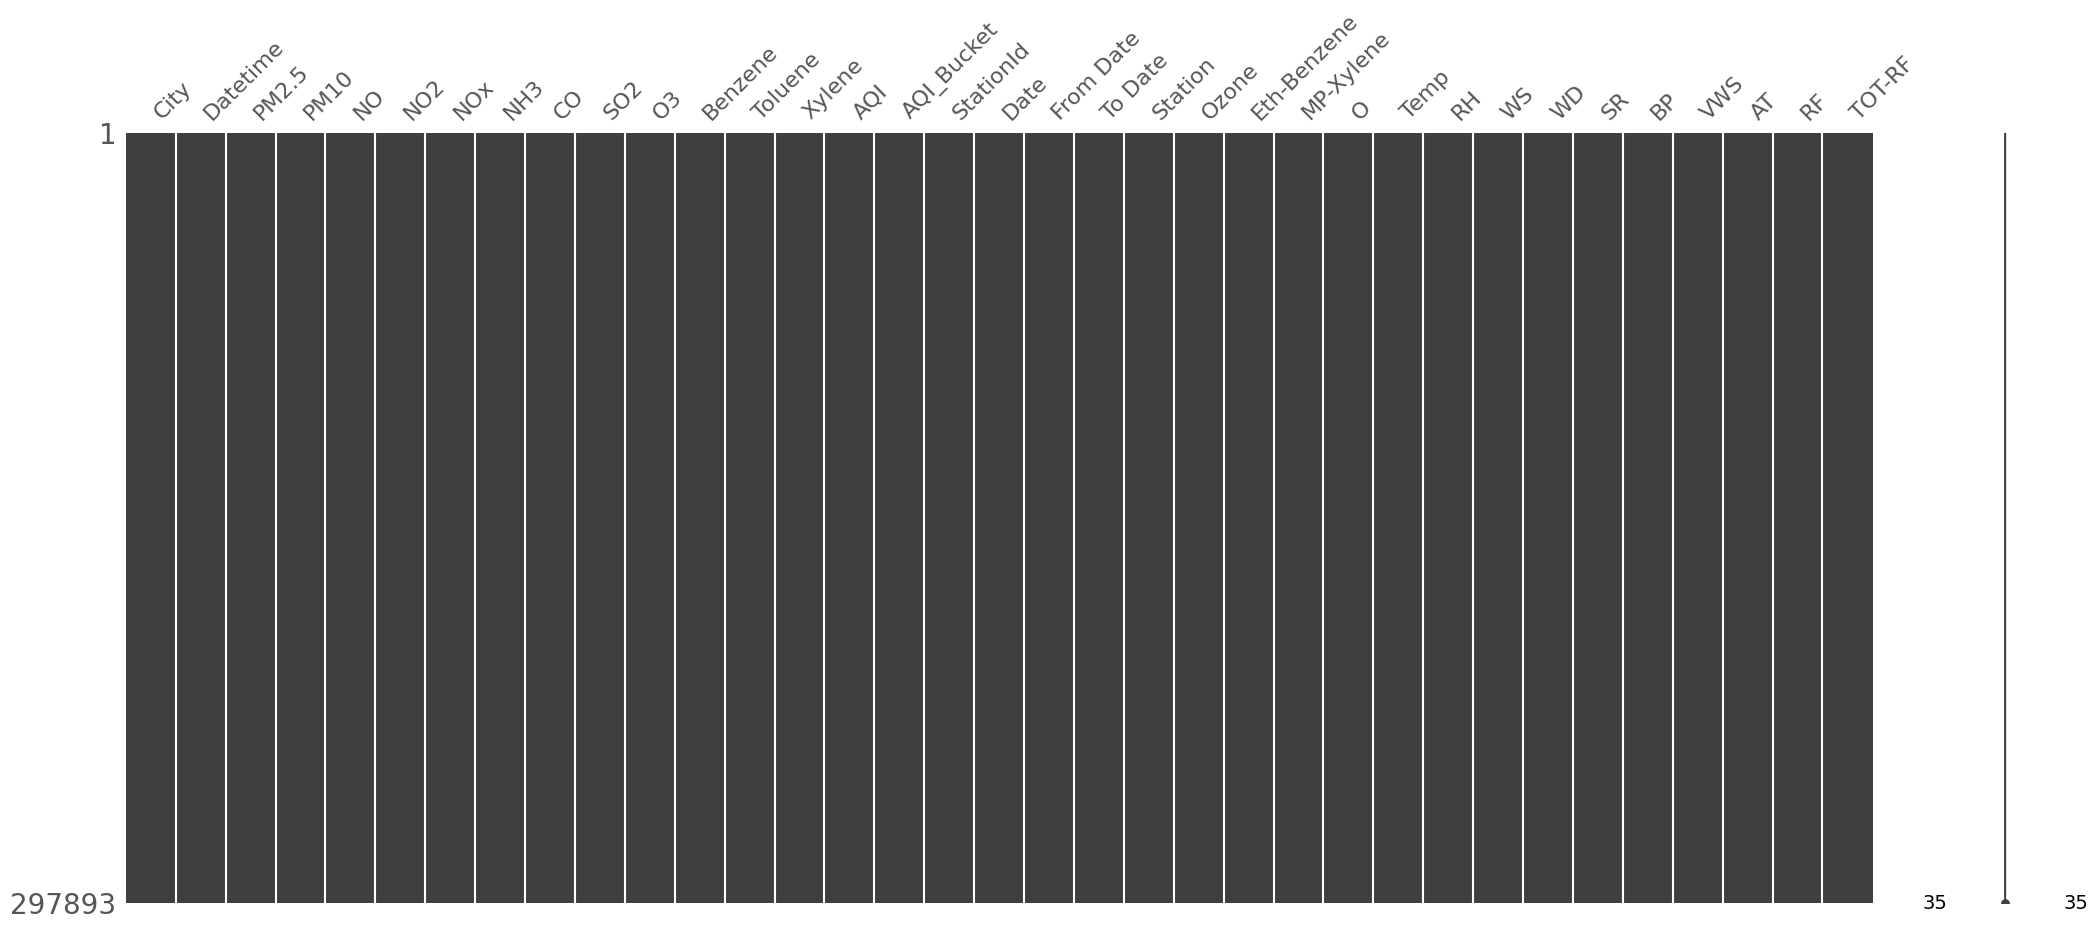

In [67]:
mno.matrix(df)

#### There are no missing values in the dataset

## 3.9) Duplicates Values in the dataset

In [68]:
df.duplicated().sum()

0

#### There are no duplicates values in the data set

## 3.10) Change data types

In [69]:
df['Date']= pd.to_datetime(df['Date'])
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])

In [70]:
con_to_chng= {'PM2.5': float, 'PM10': float, 'NO': float, 'NO2': float, 'NOx': float, 'NH3': float, 'CO': float,
              'SO2': float, 'Benzene': float, 'Toluene': float, 'Xylene': float,'Ozone': float, 'Eth-Benzene': float,
              'MP-Xylene': float, 'O': float, 'Temp': float, 'RH': float, 'WS': float, 'WD': float,'SR': float, 'BP': float,
              'VWS': float, 'AT': float, 'RF': float}


for col, new_type in con_to_chng.items():
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(new_type)
    except ValueError:
        print(f"Unable to convert column '{col}' to float.")

print(df.dtypes)

City                   object
Datetime       datetime64[ns]
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float64
NH3                   float64
CO                    float64
SO2                   float64
O3                    float64
Benzene               float64
Toluene               float64
Xylene                float64
AQI                   float64
AQI_Bucket             object
StationId              object
Date           datetime64[ns]
From Date      datetime64[ns]
To Date        datetime64[ns]
Station                object
Ozone                 float64
Eth-Benzene           float64
MP-Xylene             float64
O                     float64
Temp                  float64
RH                    float64
WS                    float64
WD                    float64
SR                    float64
BP                    float64
VWS                   float64
AT                    float64
RF        

#### Insights:
* We changed the data types according to values.

## 3.11) Check statistics of data set

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,297893.0,95.198662,88.807495,0.01,39.70,70.92,120.99,999.99
PM10,297893.0,159.828234,117.557307,0.02,72.84,140.66,194.73,999.99
NO,297893.0,15.831336,33.659635,0.01,4.32,7.19,12.98,499.99
NO2,297893.0,21.822774,22.548348,0.01,9.61,16.71,26.63,495.56
NOx,297893.0,25.884957,31.487381,0.00,10.07,19.05,28.92,496.73
NH3,297893.0,34.392623,26.772383,0.01,17.42,33.27,33.59,494.73
CO,297893.0,1.018689,1.802916,0.00,0.45,0.70,1.14,49.27
SO2,297893.0,7.011916,9.484561,0.01,2.96,3.68,7.86,199.37
O3,297893.0,22.420922,17.818591,0.01,17.65,17.65,17.65,199.80
Benzene,297893.0,3.649471,5.052073,0.00,1.80,3.40,4.99,315.21


#### Insight:
* From above description of numerical data, all means are very close to each other - between -0.14 and 746.86;
* All standard deviations are also close - between 0.11 and 214.36;
* While there is a minimum score -0.27	 and maximum score 999.99.

## 3.12) Distribution of the AQI Bucket column

In [72]:
df['AQI_Bucket'].value_counts()

Poor            232194
Moderate         23957
Very Poor        20182
Satisfactory     14844
Severe            5311
Good              1405
Name: AQI_Bucket, dtype: int64

#### Insights:
* We've some features in the `AQI_Bucket` and also values.

## 3.13) Find unique values in a column

In [73]:
print("Categories in 'AQI_Bucket' variable: ",end=" " )
print(df['AQI_Bucket'].unique())

Categories in 'AQI_Bucket' variable:  ['Poor' 'Moderate' 'Very Poor' 'Satisfactory' 'Severe' 'Good']


## 3.14) Creating a random training set

In [74]:
df = df.sample(frac = 1)
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Temp,RH,WS,WD,SR,BP,VWS,AT,RF,TOT-RF
204686,Gurugram,2020-01-04 11:00:00,48.90,97.49,7.59,11.29,18.87,12.21,0.75,3.51,...,85.01,53.06,2.50,108.67,489.13,714.70,-0.06,24.09,9.41,0.0
202677,Gurugram,2023-01-30 11:00:00,34.32,63.58,3.63,29.52,18.33,95.33,0.32,4.47,...,85.01,99.30,0.68,89.89,194.73,714.70,-0.06,16.05,0.00,0.0
51238,Gurugram,2020-04-03 00:00:00,60.47,72.84,3.01,15.18,10.36,33.27,0.35,7.09,...,52.87,1.01,1.54,267.83,176.03,920.52,0.05,24.10,0.00,0.0
264806,Gurugram,2016-09-21 10:00:00,85.25,172.93,61.96,0.05,74.80,33.59,0.50,1.92,...,85.01,94.81,0.89,337.79,169.00,714.70,-0.06,17.54,0.00,0.0
209691,Gurugram,2020-10-27 00:00:00,141.23,278.07,5.92,41.62,47.54,12.21,1.97,3.51,...,85.01,53.06,2.50,108.67,489.13,714.70,-0.06,24.09,9.41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131476,Gurugram,2020-04-03 00:00:00,224.71,312.79,44.47,35.19,54.05,41.57,1.88,6.92,...,84.50,57.32,0.64,134.31,513.50,773.65,-0.27,15.60,0.00,0.0
27078,Gurugram,2018-12-29 21:00:00,304.52,414.35,203.69,94.66,218.36,33.59,1.16,12.88,...,84.50,0.87,1.54,189.58,35.43,773.65,-0.27,24.10,0.00,0.0
81188,Gurugram,2020-04-03 00:00:00,78.13,79.70,5.70,12.88,10.50,81.86,0.55,1.99,...,84.50,92.72,0.36,78.79,5.69,773.65,-0.27,28.71,0.00,0.0
291466,Gurugram,2019-10-07 06:00:00,52.89,88.16,17.34,15.39,27.44,33.59,1.31,0.73,...,85.01,94.81,0.89,337.79,169.00,714.70,-0.06,17.54,0.00,0.0


## 3.15) Reset the index and drop index column

In [75]:
df = df.reset_index()
df = df.drop(columns=['index'])
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Temp,RH,WS,WD,SR,BP,VWS,AT,RF,TOT-RF
0,Gurugram,2020-01-04 11:00:00,48.90,97.49,7.59,11.29,18.87,12.21,0.75,3.51,...,85.01,53.06,2.50,108.67,489.13,714.70,-0.06,24.09,9.41,0.0
1,Gurugram,2023-01-30 11:00:00,34.32,63.58,3.63,29.52,18.33,95.33,0.32,4.47,...,85.01,99.30,0.68,89.89,194.73,714.70,-0.06,16.05,0.00,0.0
2,Gurugram,2020-04-03 00:00:00,60.47,72.84,3.01,15.18,10.36,33.27,0.35,7.09,...,52.87,1.01,1.54,267.83,176.03,920.52,0.05,24.10,0.00,0.0
3,Gurugram,2016-09-21 10:00:00,85.25,172.93,61.96,0.05,74.80,33.59,0.50,1.92,...,85.01,94.81,0.89,337.79,169.00,714.70,-0.06,17.54,0.00,0.0
4,Gurugram,2020-10-27 00:00:00,141.23,278.07,5.92,41.62,47.54,12.21,1.97,3.51,...,85.01,53.06,2.50,108.67,489.13,714.70,-0.06,24.09,9.41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297888,Gurugram,2020-04-03 00:00:00,224.71,312.79,44.47,35.19,54.05,41.57,1.88,6.92,...,84.50,57.32,0.64,134.31,513.50,773.65,-0.27,15.60,0.00,0.0
297889,Gurugram,2018-12-29 21:00:00,304.52,414.35,203.69,94.66,218.36,33.59,1.16,12.88,...,84.50,0.87,1.54,189.58,35.43,773.65,-0.27,24.10,0.00,0.0
297890,Gurugram,2020-04-03 00:00:00,78.13,79.70,5.70,12.88,10.50,81.86,0.55,1.99,...,84.50,92.72,0.36,78.79,5.69,773.65,-0.27,28.71,0.00,0.0
297891,Gurugram,2019-10-07 06:00:00,52.89,88.16,17.34,15.39,27.44,33.59,1.31,0.73,...,85.01,94.81,0.89,337.79,169.00,714.70,-0.06,17.54,0.00,0.0


## 3.16) Find Outliers in our dataset

In [76]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df

In [77]:
detect_outliers(df,'NO')

The number of outliers: 5839


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Temp,RH,WS,WD,SR,BP,VWS,AT,RF,TOT-RF
0,Gurugram,2020-01-04 11:00:00,48.90,97.49,-0.244844,11.29,18.87,12.21,0.75,3.51,...,85.01,53.06,2.50,108.67,489.13,714.70,-0.06,24.09,9.41,0.0
1,Gurugram,2023-01-30 11:00:00,34.32,63.58,-0.362492,29.52,18.33,95.33,0.32,4.47,...,85.01,99.30,0.68,89.89,194.73,714.70,-0.06,16.05,0.00,0.0
2,Gurugram,2020-04-03 00:00:00,60.47,72.84,-0.380912,15.18,10.36,33.27,0.35,7.09,...,52.87,1.01,1.54,267.83,176.03,920.52,0.05,24.10,0.00,0.0
3,Gurugram,2016-09-21 10:00:00,85.25,172.93,1.370447,0.05,74.80,33.59,0.50,1.92,...,85.01,94.81,0.89,337.79,169.00,714.70,-0.06,17.54,0.00,0.0
4,Gurugram,2020-10-27 00:00:00,141.23,278.07,-0.294458,41.62,47.54,12.21,1.97,3.51,...,85.01,53.06,2.50,108.67,489.13,714.70,-0.06,24.09,9.41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292049,Gurugram,2020-04-03 00:00:00,37.27,57.77,-0.360115,19.51,23.22,12.21,0.86,3.51,...,84.50,53.06,2.50,108.67,489.13,773.65,-0.27,24.09,9.41,0.0
292050,Gurugram,2020-04-03 00:00:00,224.71,312.79,0.850833,35.19,54.05,41.57,1.88,6.92,...,84.50,57.32,0.64,134.31,513.50,773.65,-0.27,15.60,0.00,0.0
292051,Gurugram,2020-04-03 00:00:00,78.13,79.70,-0.300994,12.88,10.50,81.86,0.55,1.99,...,84.50,92.72,0.36,78.79,5.69,773.65,-0.27,28.71,0.00,0.0
292052,Gurugram,2019-10-07 06:00:00,52.89,88.16,0.044821,15.39,27.44,33.59,1.31,0.73,...,85.01,94.81,0.89,337.79,169.00,714.70,-0.06,17.54,0.00,0.0


In [78]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationId', 'Date', 'From Date', 'To Date', 'Station', 'Ozone',
       'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP',
       'VWS', 'AT', 'RF', 'TOT-RF'],
      dtype='object')

## 3.17 Extract columns based on two categories

In [79]:
extracted_columns = df[['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationId', 'Date', 'From Date', 'To Date', 'Station', 'Ozone',
       'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP',
       'VWS', 'AT', 'RF', 'TOT-RF']]

# Access the extracted columns
Good_Air_Gas = extracted_columns.loc[:, ['O3', 'Temp', 'RH', 'WS', 'SR', 'TOT-RF']].sort_values(["Temp"], ascending=[True])
Bad_Air_Gas = extracted_columns.loc[:, ['PM2.5', 'PM10', 'NO', 'CO', 'SO2', "Benzene", 'Toluene', 'Xylene', 'AQI', 'BP']].sort_values(['PM2.5'], ascending=[True])

# print the output
print(pd.DataFrame(Good_Air_Gas))
print("---------------------------------------------------------------------------------")
print(pd.DataFrame(Bad_Air_Gas))

           O3   Temp    RH    WS      SR  TOT-RF
53017   17.65   3.86  0.63  1.54  571.72     0.0
107318  17.65   3.86  0.63  1.54  571.72     0.0
110285  17.65   3.94  0.76  1.54  823.40     0.0
129485  17.65   3.94  0.76  1.54  823.40     0.0
141158  17.65   4.16  0.87  1.54  621.46     0.0
...       ...    ...   ...   ...     ...     ...
146784  17.65  96.32  1.58  1.54   12.20     0.0
214071  17.65  96.32  1.58  1.54   12.20     0.0
144970  17.65  96.32  0.17  1.54   61.31     0.0
30139   17.65  96.34  1.59  1.54   12.50     0.2
289162  17.65  96.34  1.59  1.54   12.50     0.2

[297893 rows x 6 columns]
---------------------------------------------------------------------------------
         PM2.5    PM10     NO    CO   SO2  Benzene  Toluene  Xylene    AQI  \
120471    0.01   35.52   5.95  0.52  3.56     0.58     9.22    6.92  232.0   
260871    0.01   39.08   5.33  0.57  4.44     3.21     0.66    0.69  232.0   
177615    0.01   35.52   5.95  0.52  3.56     0.58     9.22    6.92  

# Insights:

  **Columns potentially harmful to health:**
  * *PM2.5 and PM10 - Particulate Matter, especially PM2.5, is detriment*  when  inhaled.*
  * *NO (Nitric Oxide), NO2 (Nitrogen Dioxide), NOx (Nitrogen Oxides)*    Irritate respiratory pathways.*
  * *CO (Carbon Monoxide) - Highly toxic and can be fatal in hi*    concentrations.*
  * *SO2 (Sulfur Dioxide) - Irritates the respiratory system and can cau*   breathing difficulties.*
  * *Benzene, Toluene, Xylene - Volatile organic compounds (VOCs) harmf* when   inhaled.*
  * *AQI (Air Quality Index) - Represents overall air quality; higher A often  means poorer air quality.*
  * *Atmospheric Pressure (BP) - Drastic changes in pressure can affe* some   individuals.*



**Columns potentially Good for health:**

  * *O3 (Ozone) - In the upper atmosphere, it protects us from the sun's ultraviolet rays, but at ground level, it can be harmful.*
  * *Temperature (Temp) - Within a comfortable range, it's beneficial for health.*
  * *Relative Humidity (RH) - Moderate humidity levels can be good for health.*
  * *Wind Speed (WS) - Adequate ventilation helps disperse pollutants.*
  * *Solar Radiation (SR) - In moderate amounts, sunlight is beneficial.*
  * *Total Rainfall (TOT-RF) - Helps in clearing pollutants from the air.*

# 4.) Exploring Data ( Visualization )
## 4.1 Visualize AQI distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

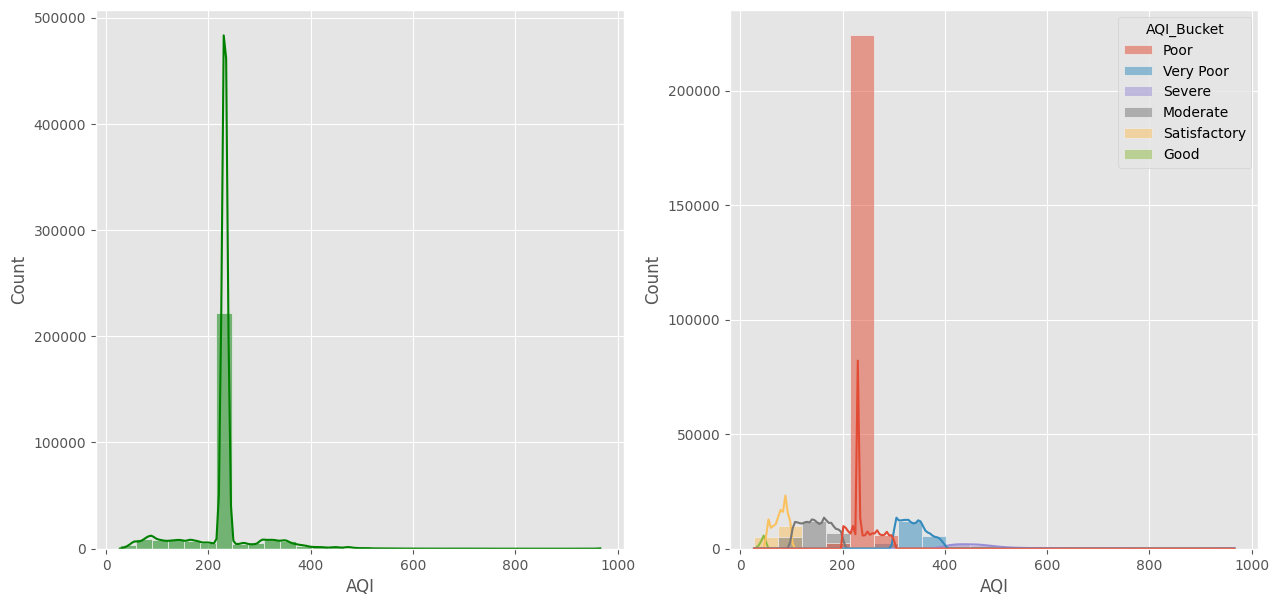

In [80]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'AQI', color='g', kde= True, bins = 30)
plt.subplot(122)
sns.histplot(data = df, x='AQI', hue = 'AQI_Bucket', kde= True)
plt.show()

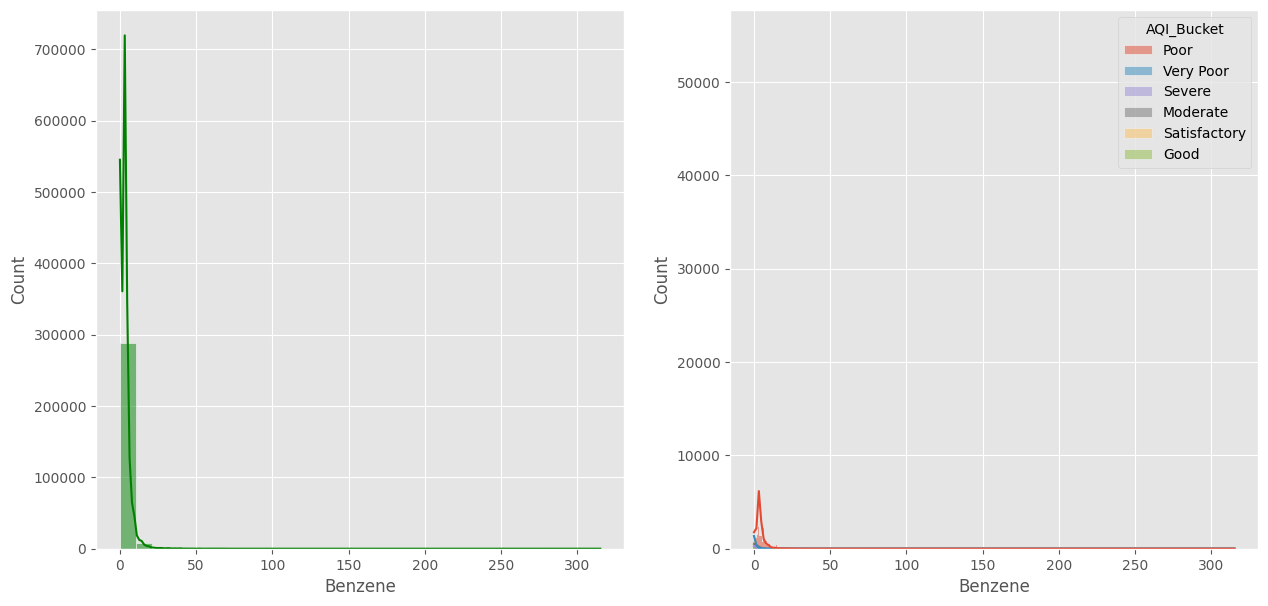

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Benzene',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Benzene',kde=True, hue='AQI_Bucket')
plt.show()

### Insight:
* `AQI` distribution: Poor is more and range 200-400.
*  `Benzene` counts concentrated in lower range (0-50), fewer in higher range (200-300).

# 4.2) Bar Plot

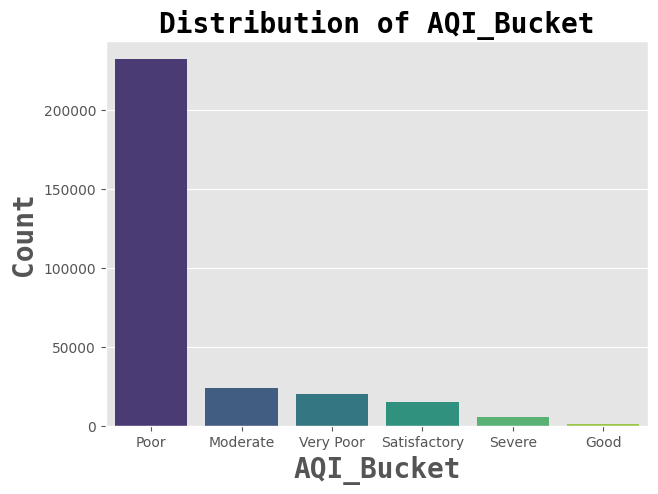

In [82]:
AQI_Bucket = df['AQI_Bucket'].value_counts()
plt.figure(figsize= (7,5))
sns.barplot(x= AQI_Bucket.index, y= AQI_Bucket.values, palette='viridis')
plt.title('Distribution of AQI_Bucket', fontdict= {'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('AQI_Bucket', fontdict= {'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Count', fontdict= {'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.tick_params(labelsize= 10)
plt.show()

## Insights:
Distribution of `AQI_Bucket`: Poor is more according to others.

## 4.3) Correlation Matrix

In [83]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Temp,RH,WS,WD,SR,BP,VWS,AT,RF,TOT-RF
PM2.5,1.000000,0.538155,0.187910,0.165996,0.194570,0.177450,0.288773,0.087414,-0.045028,0.099826,...,0.029070,0.027397,-0.124556,0.126577,-0.142567,-0.018594,-0.030631,-0.212231,-0.106422,-0.016926
PM10,0.538155,1.000000,0.119835,0.118143,0.114303,0.234965,0.134434,-0.043356,0.019394,0.131780,...,0.184331,0.187873,-0.209911,0.159910,-0.089202,-0.050917,-0.144029,-0.157284,-0.043415,-0.019736
NO,0.187910,0.119835,1.000000,0.489856,0.810272,0.203880,0.122537,0.107129,-0.045132,0.064298,...,0.046487,-0.010408,-0.021859,0.030808,-0.106817,0.026983,-0.004329,-0.133743,-0.052639,-0.005928
NO2,0.165996,0.118143,0.489856,1.000000,0.566563,0.158298,0.086284,0.111811,0.029723,0.047211,...,-0.046241,-0.098912,0.069379,0.011897,-0.080219,0.065324,0.018075,-0.111716,-0.043323,-0.007403
NOx,0.194570,0.114303,0.810272,0.566563,1.000000,0.110089,0.134338,0.147014,-0.034684,-0.000236,...,0.027817,-0.063020,0.125383,-0.041650,-0.043894,0.033101,0.003024,-0.104850,0.028095,-0.006465
NH3,0.177450,0.234965,0.203880,0.158298,0.110089,1.000000,0.065005,0.002004,-0.026514,0.200802,...,0.010437,0.101709,-0.423155,0.221395,-0.318263,-0.002542,-0.008561,-0.159779,-0.333642,0.000814
CO,0.288773,0.134434,0.122537,0.086284,0.134338,0.065005,1.000000,0.046312,-0.072097,0.041990,...,0.028369,-0.002999,-0.014215,0.038001,-0.068015,-0.007482,-0.007634,-0.103622,-0.010886,-0.005259
SO2,0.087414,-0.043356,0.107129,0.111811,0.147014,0.002004,0.046312,1.000000,0.043778,-0.020121,...,-0.096887,-0.156709,-0.047519,0.081492,-0.116472,0.045437,0.070172,-0.030902,-0.149937,-0.007866
O3,-0.045028,0.019394,-0.045132,0.029723,-0.034684,-0.026514,-0.072097,0.043778,1.000000,-0.115805,...,0.066511,-0.002435,-0.051908,0.167079,-0.138198,-0.010566,-0.061250,-0.115395,-0.108937,-0.006729
Benzene,0.099826,0.131780,0.064298,0.047211,-0.000236,0.200802,0.041990,-0.020121,-0.115805,1.000000,...,-0.049297,0.075457,-0.127844,-0.031647,0.013761,0.069207,0.002438,0.005018,-0.019390,0.002971


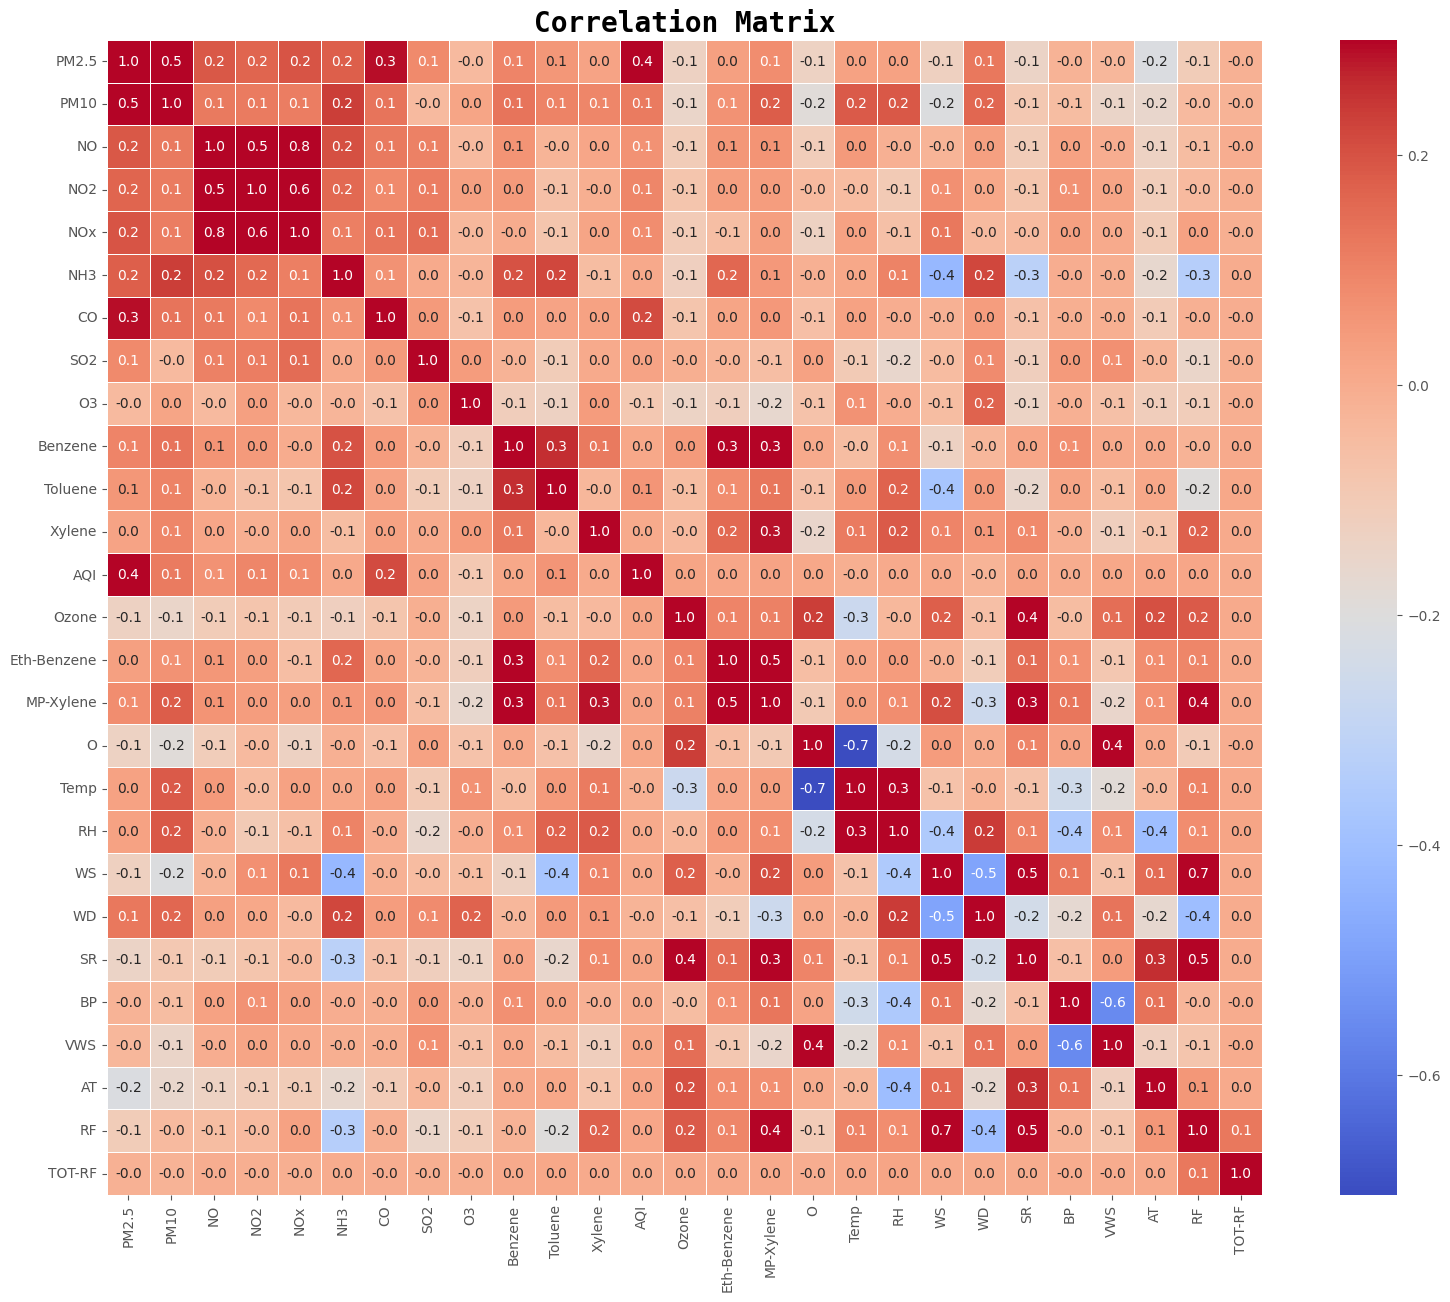

In [84]:
# Heatmap with correlation matrix
corr = df.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt= '.1f',
            xticklabels= True, yticklabels= True, vmax=0.3,
            cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Correlation Matrix', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

### Insights:
* Strongest Correlations: Identify values close to 1 or -1.
* Strongest Correlations: The correlation matrix is between WS and WD (0.7).
* Weakest Correlations: The correlation matrix is between RH and MP-Xylene (0.001).

## 4.4) Dis plot with Good Air Gas

In [85]:
cols = []
for g_col in Good_Air_Gas.columns:
    if df[g_col].dtype == float:
        cols.append(g_col)

cols

['O3', 'Temp', 'RH', 'WS', 'SR', 'TOT-RF']

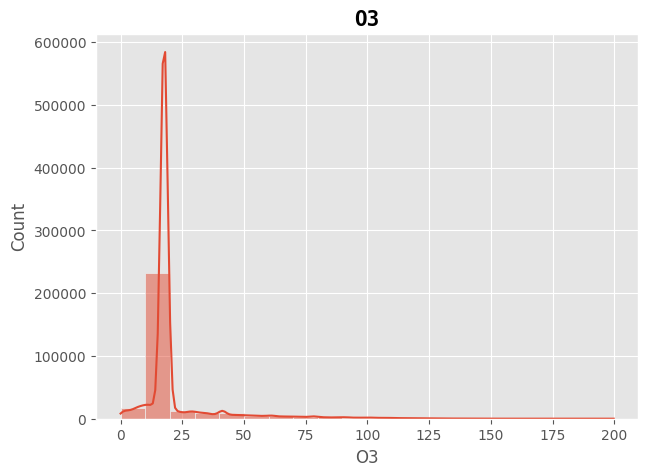

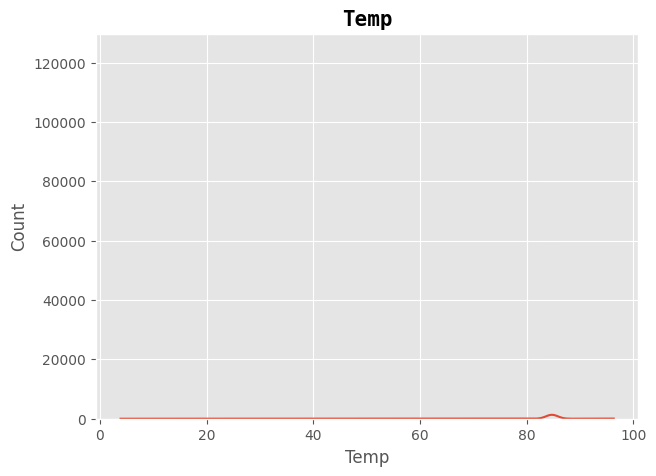

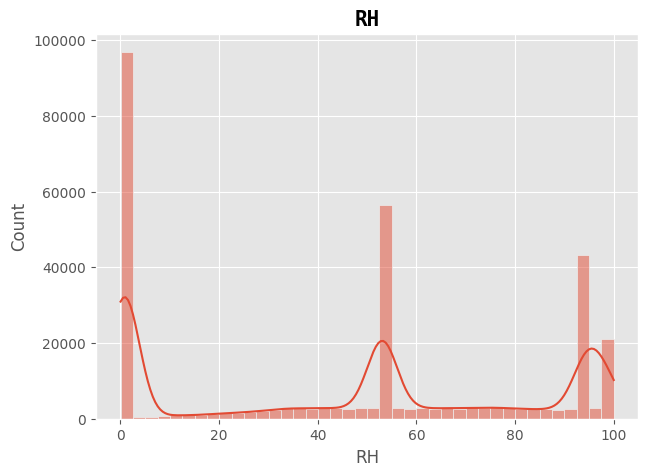

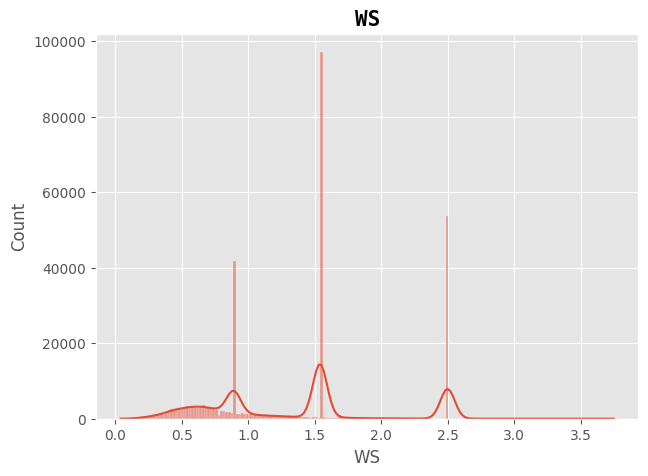

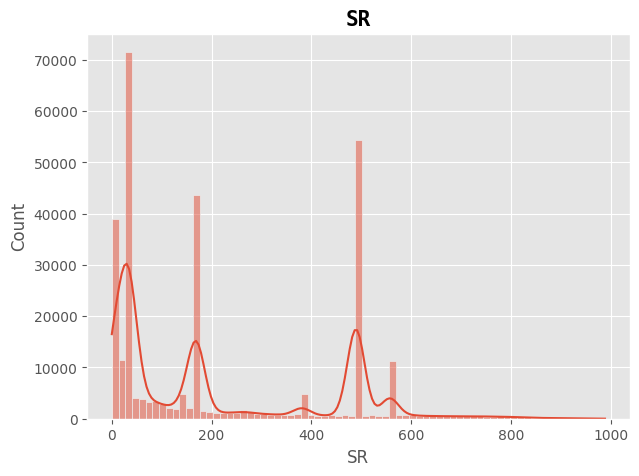

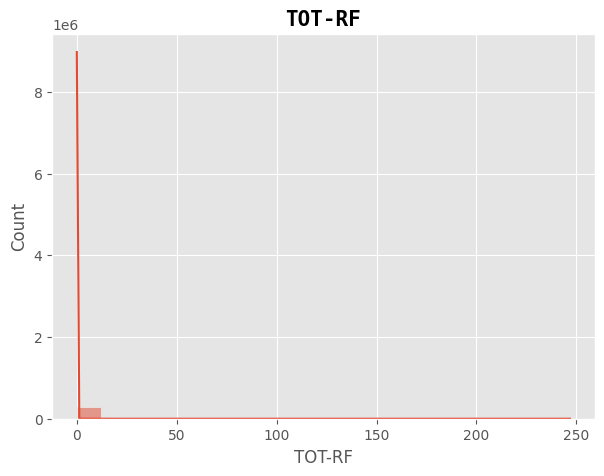

In [86]:
for g_col in cols:
    plt.figure(figsize=(7,5))
    sns.histplot(data=df, x=g_col, kde=True)
    plt.title(g_col, fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

## Insights:
* O3 is greater in 0 to 25 range.

## 4.5) Dist plot with

In [87]:
cols = []
for b_col in Bad_Air_Gas.columns:
    if df[b_col].dtype == float:
        cols.append(b_col)

cols

['PM2.5',
 'PM10',
 'NO',
 'CO',
 'SO2',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'BP']

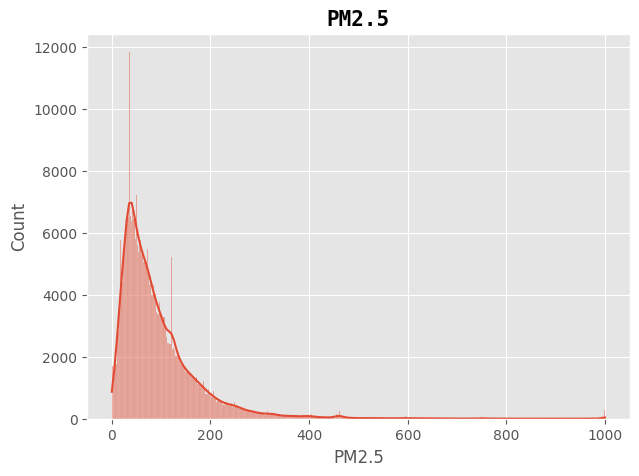

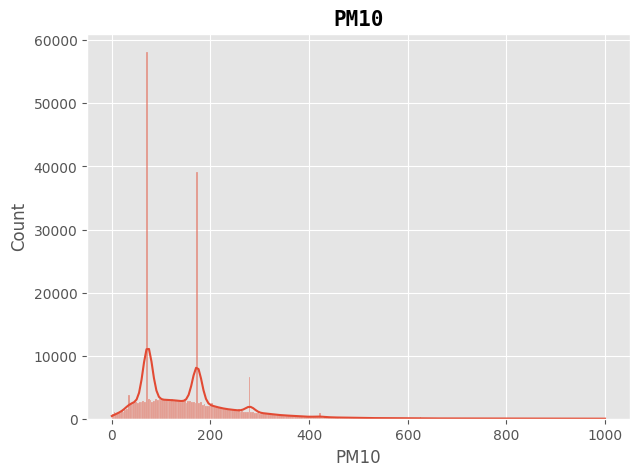

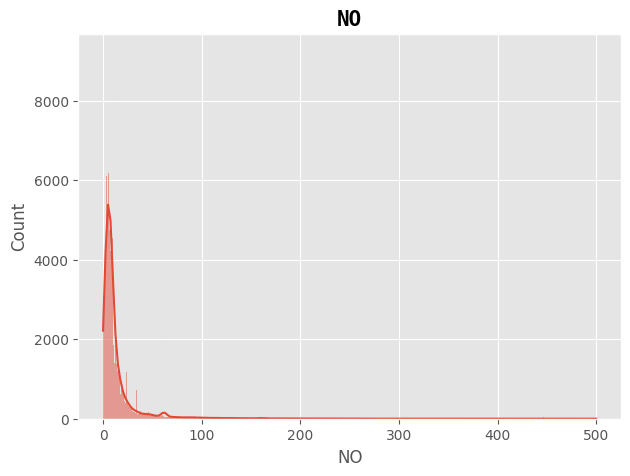

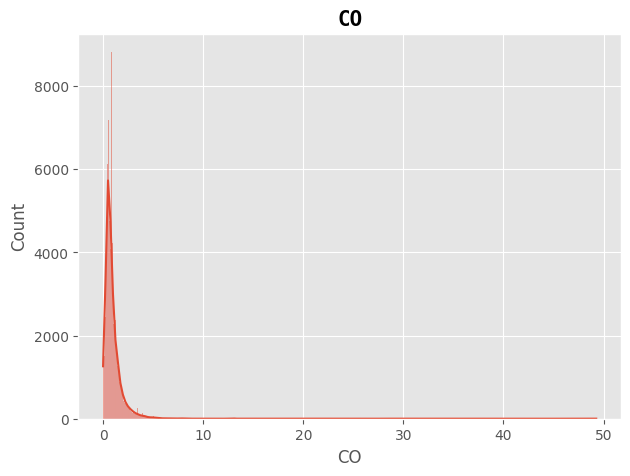

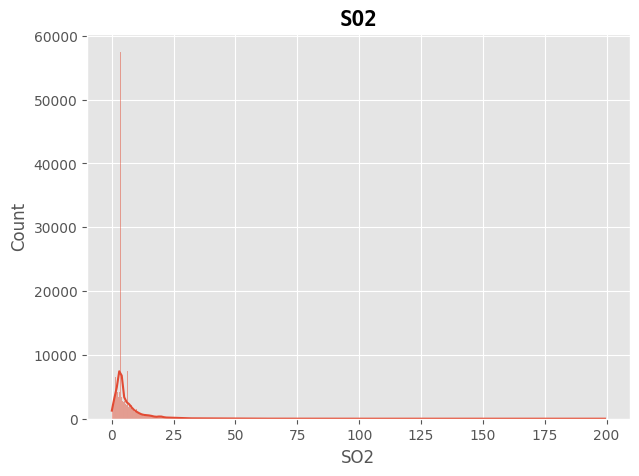

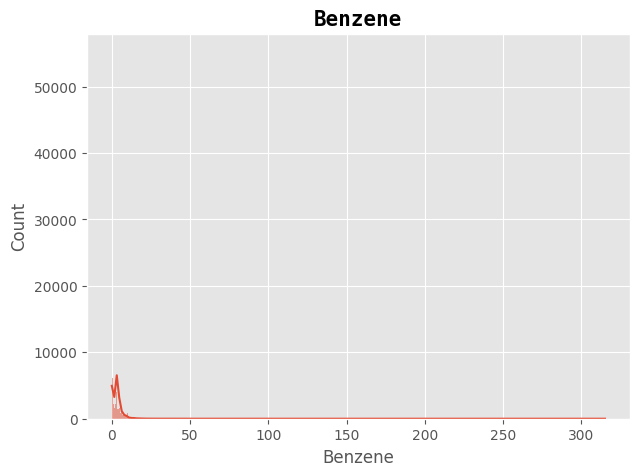

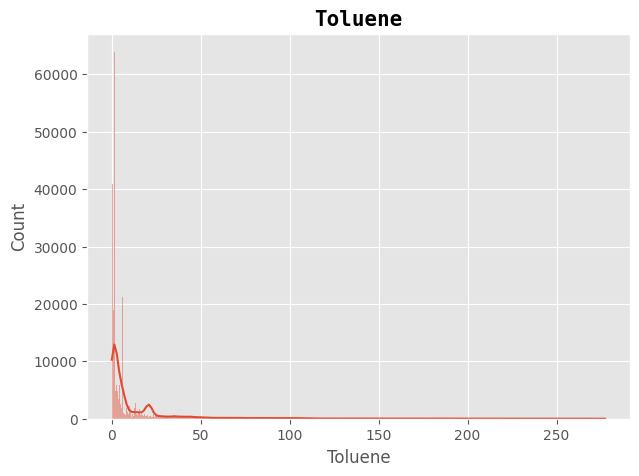

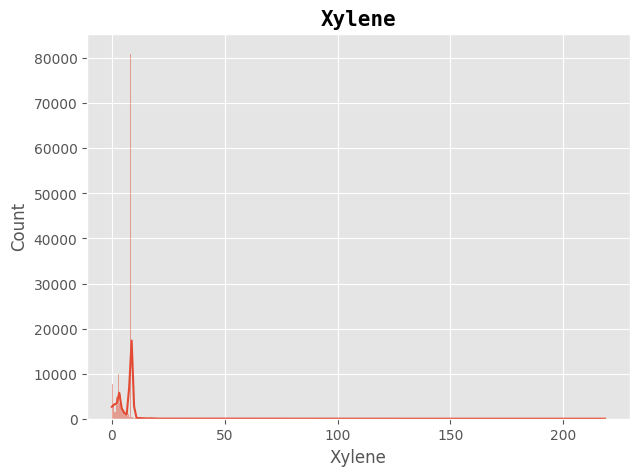

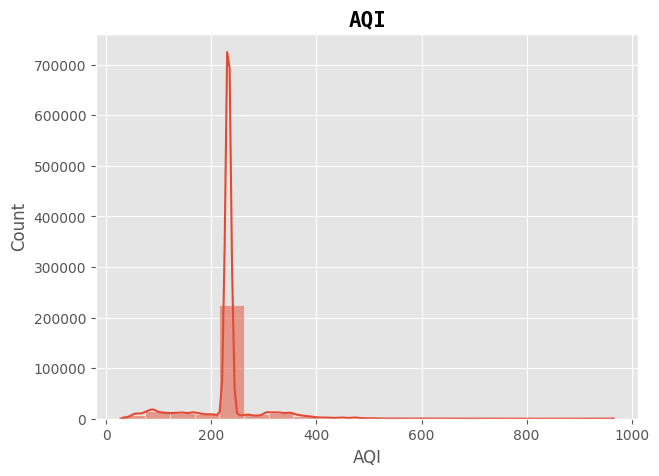

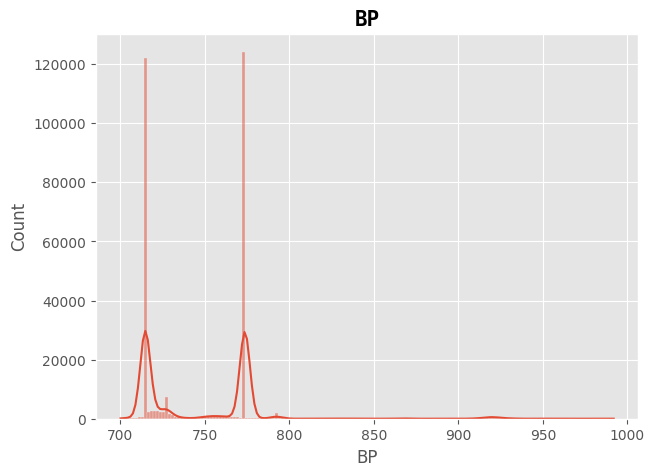

In [88]:
for b_col in cols:
    plt.figure(figsize=(7,5))
    sns.histplot(data=df, x=b_col, kde=True)
    plt.title(b_col, fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

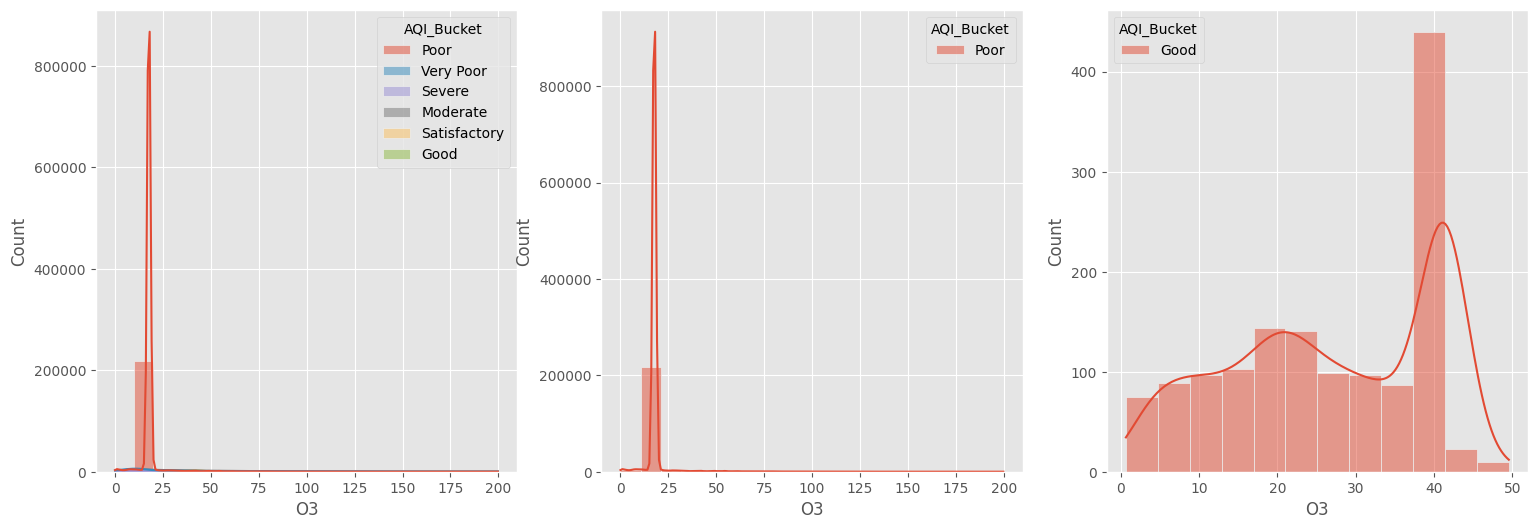

In [89]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df, x='O3', kde=True, hue='AQI_Bucket')
plt.subplot(142)
ax =sns.histplot(data=df[df.AQI_Bucket=='Poor'], x='O3', kde=True, hue='AQI_Bucket')
plt.subplot(143)
ax =sns.histplot(data=df[df.AQI_Bucket=='Good'], x='O3', kde=True, hue='AQI_Bucket')
plt.show()

## 4.6) Violin Plot with some columns

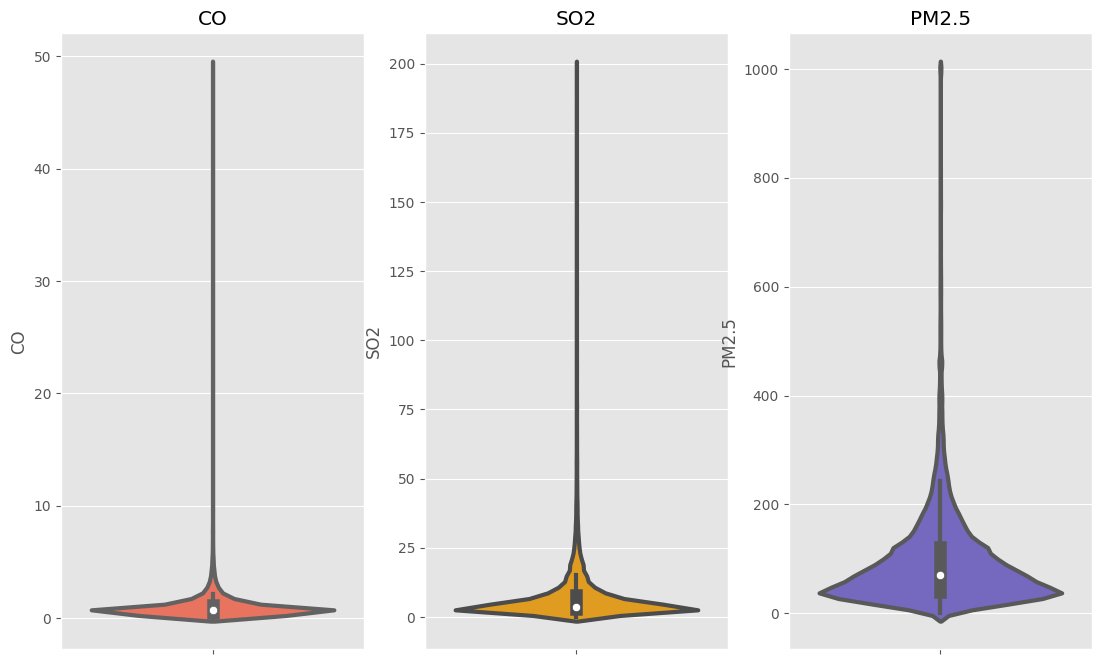

In [90]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('CO')
sns.violinplot(y='CO',data=df, color='tomato', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('SO2')
sns.violinplot(y='SO2',data=df, color='orange', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('PM2.5')
sns.violinplot(y='PM2.5',data=df, color='slateblue', linewidth=3)
plt.show()

## 4.7) Checking Outliers

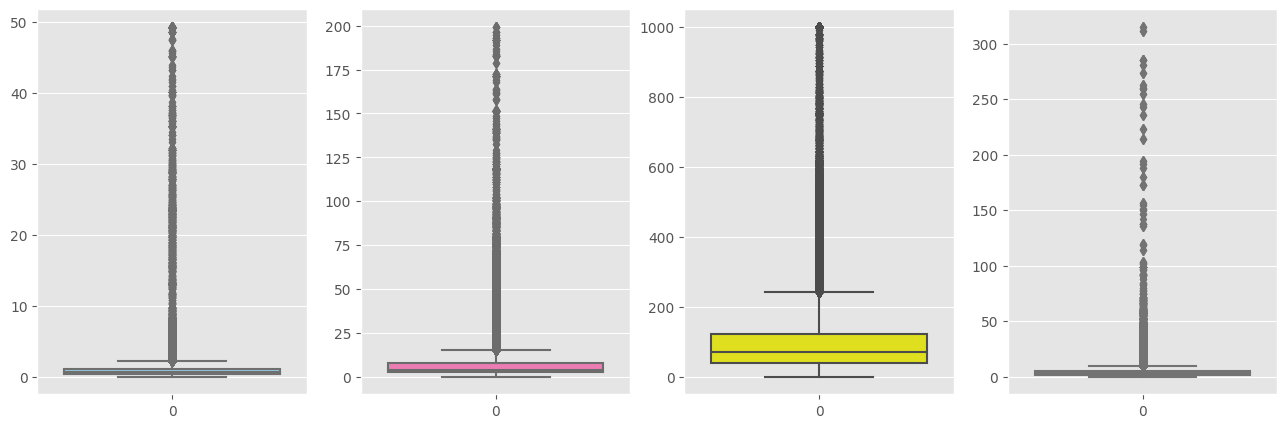

In [91]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['CO'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['SO2'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['PM2.5'], color='yellow')
plt.subplot(144)
sns.boxplot(df['Benzene'],color='lightgreen')
plt.show()

## 4.8) Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

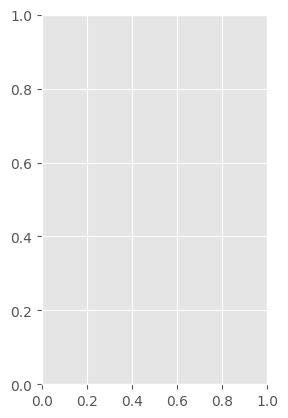

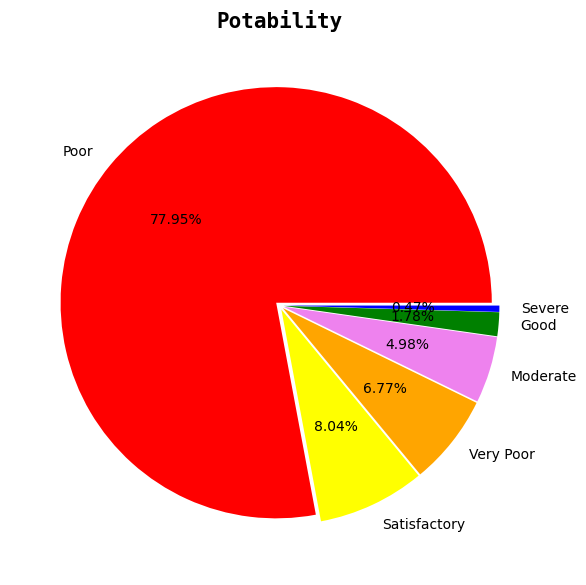

In [92]:
plt.subplot(1,2,1)
size = df['AQI_Bucket'].value_counts()
labels = 'Poor', 'Satisfactory', 'Very Poor', 'Moderate', 'Good', 'Severe'
color = ['red','yellow', 'orange', 'violet', 'green', 'blue']
explode = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

plt.figure(figsize=(9, 7))
plt.pie(size, colors = color,labels = labels, autopct='%1.2f%%', explode = explode)
plt.title('Potability', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.axis('off')

## Insights:
* Poor is more then other 77.95%

## 4.10) MUTIVARIATE ANALYSIS USING PAIRPLOT


In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(df, hue = 'AQI_Bucket')
plt.show()